In [44]:
import pickle
import os

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, classification_report, cohen_kappa_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from statistics import mean
import seaborn as sns

In [2]:
wd = os.path.dirname(os.getcwd())
save_file = os.path.sep.join([wd, "asset", "data", "scaled_data.csv"])

In [3]:
with open(save_file, 'rb') as handle:
    data = pickle.load(handle)

In [4]:
X_train, y_train = data["train"]
X_test, y_test = data["test"]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((214337, 127), (214337,)), ((91882, 127), (91882,)))

In [5]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from sklearn.linear_model import LogisticRegressionCV

clf_LR = LogisticRegressionCV(scoring="f1", cv=StratifiedKFold(n_splits=3), class_weight="balanced", solver='liblinear')


In [6]:
pipeline = Pipeline(steps=[('m', clf_LR)])
pipeline.fit(X_train, y_train)

print(clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.23068020798325845
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     84380
           1       0.14      0.63      0.23      7502

    accuracy                           0.66     91882
   macro avg       0.55      0.65      0.51     91882
weighted avg       0.89      0.66      0.74     91882



In [8]:
under = RandomUnderSampler(sampling_strategy=.25)

pipeline = Pipeline(steps=[('u', under), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print(clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.42050395726431283
              precision    recall  f1-score   support

           0       0.95      0.64      0.77     84380
           1       0.14      0.66      0.23      7502

    accuracy                           0.64     91882
   macro avg       0.55      0.65      0.50     91882
weighted avg       0.89      0.64      0.72     91882



In [9]:
under = RandomUnderSampler(sampling_strategy=.5)

pipeline = Pipeline(steps=[('u', under), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print(clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.5446899634966788
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     84380
           1       0.14      0.64      0.23      7502

    accuracy                           0.66     91882
   macro avg       0.55      0.65      0.51     91882
weighted avg       0.89      0.66      0.74     91882



In [10]:
under = RandomUnderSampler(sampling_strategy=.75)

pipeline = Pipeline(steps=[('u', under), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print(clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.6064002371992937
              precision    recall  f1-score   support

           0       0.97      0.23      0.37     84380
           1       0.10      0.91      0.17      7502

    accuracy                           0.28     91882
   macro avg       0.53      0.57      0.27     91882
weighted avg       0.90      0.28      0.35     91882



In [11]:
over = RandomOverSampler(sampling_strategy=.25)

pipeline = Pipeline(steps=[('o', over), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print(clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.4265992641214344
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     84380
           1       0.14      0.65      0.23      7502

    accuracy                           0.65     91882
   macro avg       0.55      0.65      0.50     91882
weighted avg       0.89      0.65      0.73     91882



In [12]:
over = RandomOverSampler(sampling_strategy=.5)

pipeline = Pipeline(steps=[('o', over), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print(clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.5528374616130252
              precision    recall  f1-score   support

           0       0.97      0.28      0.44     84380
           1       0.10      0.89      0.18      7502

    accuracy                           0.33     91882
   macro avg       0.53      0.59      0.31     91882
weighted avg       0.90      0.33      0.42     91882



In [13]:
over = RandomOverSampler(sampling_strategy=.75)

pipeline = Pipeline(steps=[('o', over), ('m', clf_LR)])
pipeline.fit(X_train, y_train)

print(clf_LR.scores_[1].mean())
print(classification_report(y_test, pipeline.predict(X_test)))

0.6123131346823797
              precision    recall  f1-score   support

           0       0.97      0.23      0.37     84380
           1       0.10      0.91      0.17      7502

    accuracy                           0.29     91882
   macro avg       0.53      0.57      0.27     91882
weighted avg       0.90      0.29      0.36     91882



In [42]:
under = RandomUnderSampler(sampling_strategy=.65)
over = RandomOverSampler(sampling_strategy=.8)

pipeline = Pipeline(steps=[('u', under), ('m', clf_LR)])
a,b = under.fit_resample(X_train, y_train)
c,d = over.fit_resample(a, b)
# sns.histplot(b)
#
# print(clf_LR.scores_[1].mean())
# print(classification_report(y_test, pipeline.predict(X_test)))

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

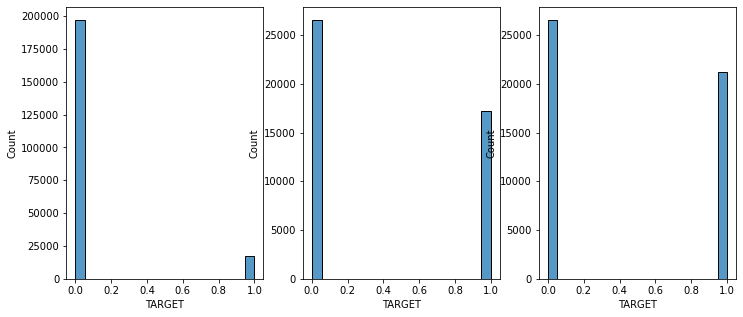

In [49]:
fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=3)
axes=axes.ravel()
sns.histplot(y_train, ax=axes[0])
sns.histplot(b, ax=axes[1])
sns.histplot(d, ax=axes[2])

In [10]:
models = []
cv_score = []

LogisticRegression(solver='liblinear')

In [14]:
# from sklearn.linear_model import LogisticRegressionCV
# clf_LR = LogisticRegressionCV(scoring=cohen_kappa_score, cv=StratifiedKFold(3), solver='liblinear', class_weight="balanced")
# scores = cross_val_score(clf_LR, X_train, y_train, cv=StratifiedKFold(3), scoring="f1")
# models += ["Logistic Regression"]
# cv_score += mean(scores)
# 
# clf_LR.fit(X_train, y_train)
# print(classification_report(y_test, clf_LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79     84528
           1       0.14      0.62      0.23      7376

    accuracy                           0.67     91904
   macro avg       0.55      0.65      0.51     91904
weighted avg       0.89      0.67      0.75     91904



In [15]:
# from sklearn.linear_model import SGDClassifier
# clf_SGD = SGDClassifier(class_weight="balanced").fit(X_train, y_train)
# scores = cross_val_score(clf_SGD, X_train, y_train, cv=StratifiedKFold(3), scoring="f1")
# models += ["SGD"]
# cv_score += mean(scores)
# 
# clf_SGD.fit(X_train, y_train)
# print(classification_report(y_test, clf_SGD.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     84528
           1       0.16      0.49      0.24      7376

    accuracy                           0.75     91904
   macro avg       0.55      0.63      0.55     91904
weighted avg       0.88      0.75      0.80     91904



In [16]:
# from sklearn.ensemble import GradientBoostingClassifier
# clf_ensemble = GradientBoostingClassifier().fit(X_train, y_train)
# scores = cross_val_score(clf_ensemble, X_train, y_train, cv=StratifiedKFold(3), scoring="f1")
# models += ["Tree Boosting"]
# cv_score += mean(scores)
# 
# clf_ensemble.fit(X_train, y_train)
# print(classification_report(y_test, clf_ensemble.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84528
           1       0.11      0.00      0.01      7376

    accuracy                           0.92     91904
   macro avg       0.52      0.50      0.48     91904
weighted avg       0.85      0.92      0.88     91904

